In [63]:
#!pip install face_recognition

In [64]:
import os
import glob

In [65]:
known_faces = []
known_names = []
known_faces_paths = []

registered_faces_path = 'registered/'
for name in os.listdir(registered_faces_path):
    images_mask = '%s%s/*.jpg' % (registered_faces_path, name)
    images_paths = glob.glob(images_mask) 
    known_faces_paths += images_paths
    known_names += [name for x in images_paths]


In [66]:
for name,images_path in zip(known_names, known_faces_paths):
    print('%s: %s' % (name, images_path))

elon: registered/elon\1.jpg
elon: registered/elon\2.jpg
elon: registered/elon\3.jpg
elon: registered/elon\4.jpg
elon: registered/elon\5.jpg
elon: registered/elon\8.jpg
mark: registered/mark\10.jpg
mark: registered/mark\2.jpg
mark: registered/mark\3.jpg
mark: registered/mark\4.jpg
mark: registered/mark\5.jpg
mark: registered/mark\6.jpg
mark: registered/mark\7.jpg
uncal: registered/uncal\1.jpg
uncal: registered/uncal\2.jpg
uncal: registered/uncal\3.jpg
uncal: registered/uncal\4.jpg
uncal: registered/uncal\6.jpg
uncal: registered/uncal\7.jpg
uncal: registered/uncal\8.jpg


In [67]:
import face_recognition
def get_encodings(img_path):
    image = face_recognition.load_image_file(img_path)
    encoding = face_recognition.face_encodings(image)
    return encoding[0]

In [68]:
known_faces = [get_encodings(img_path) for img_path in known_faces_paths]

In [69]:
unknown_images = glob.glob('unknown/*.jpg')

In [70]:
import matplotlib.pyplot as plt

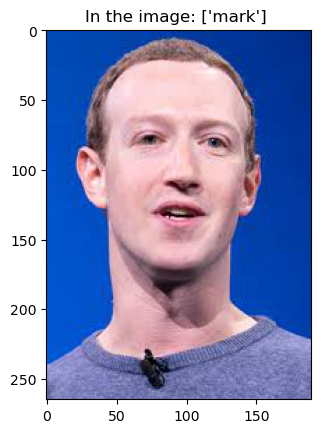

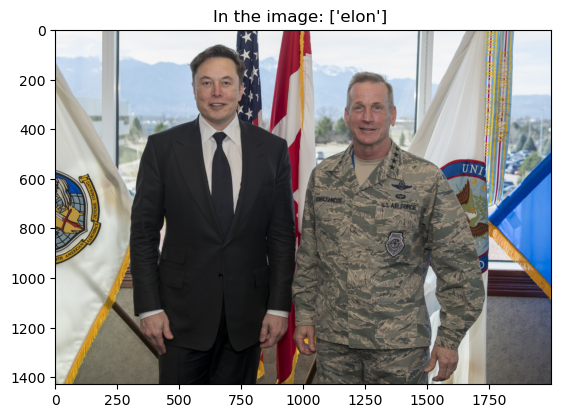

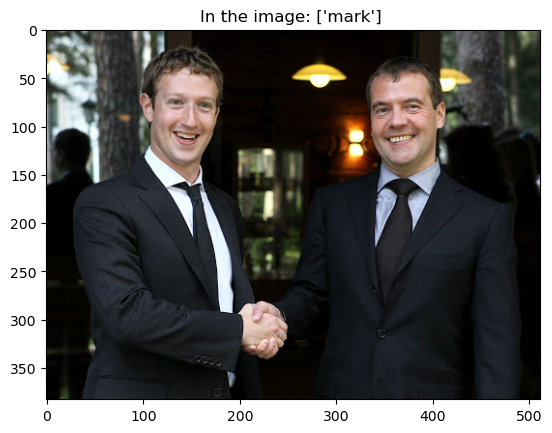

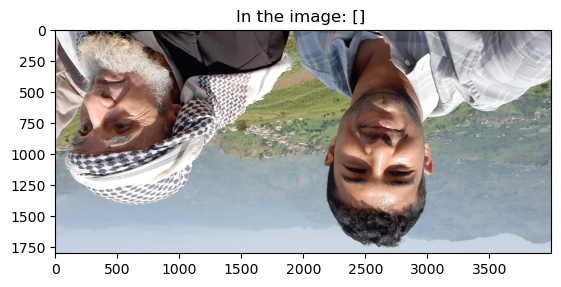

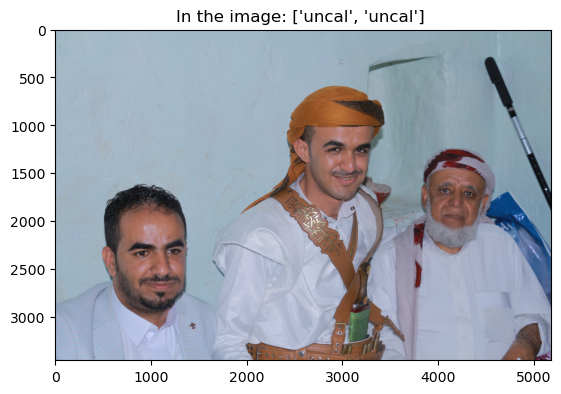

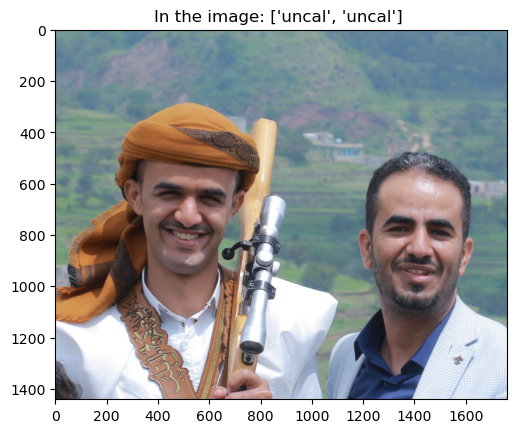

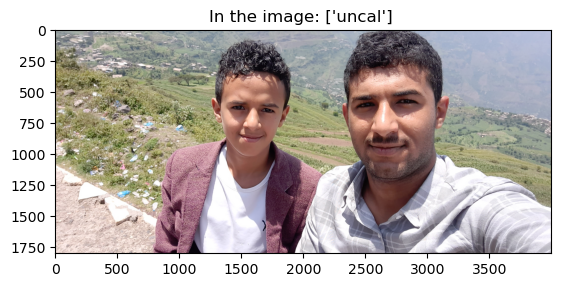

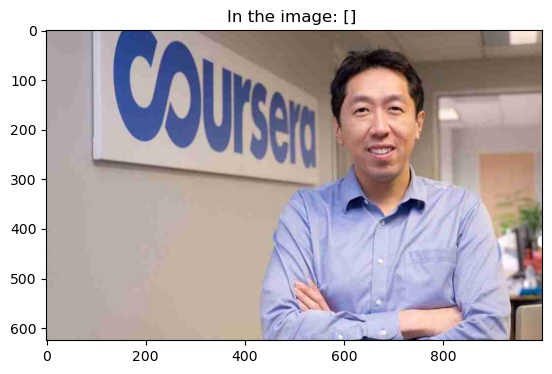

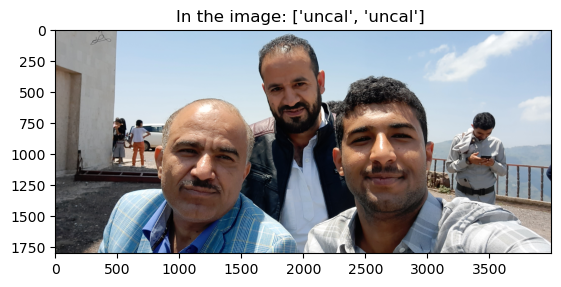

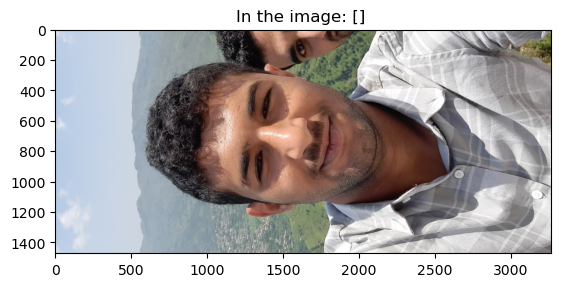

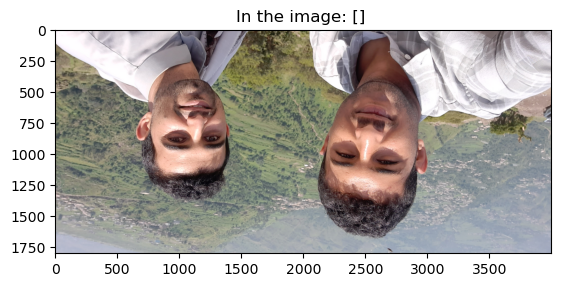

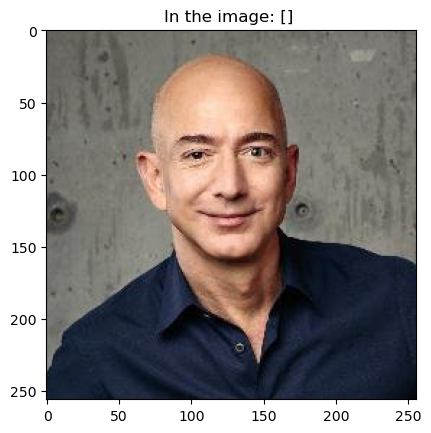

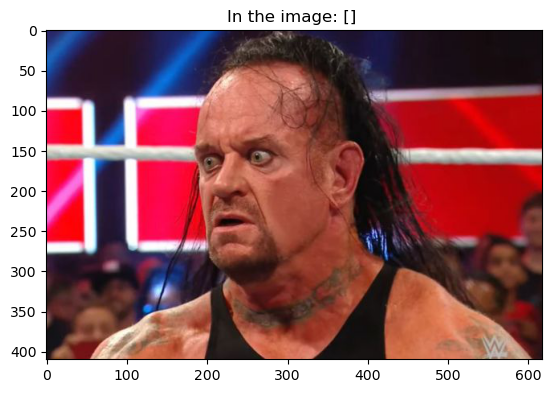

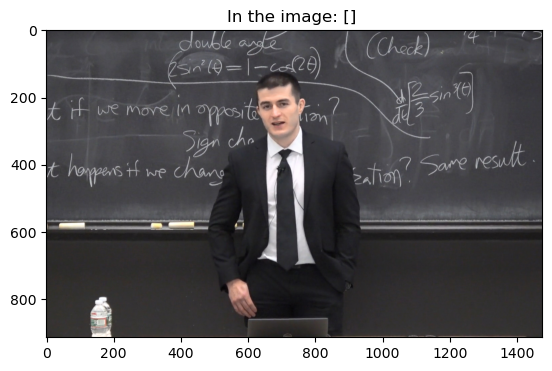

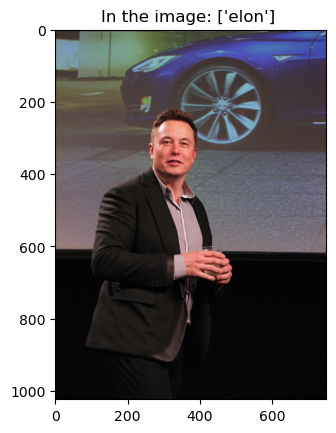

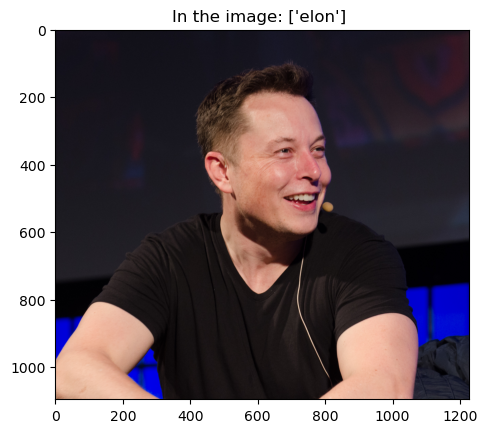

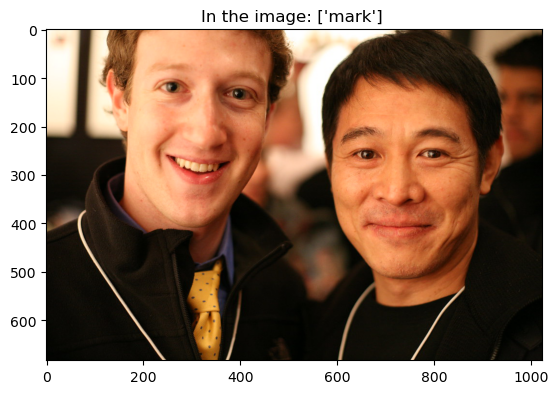

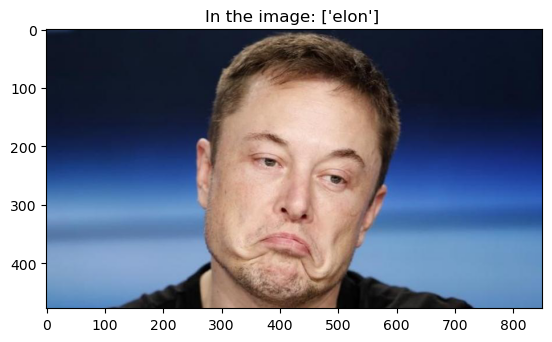

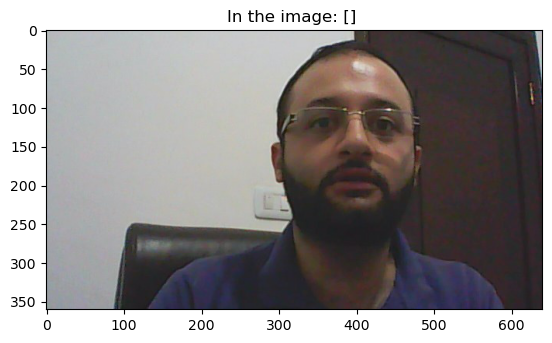

In [71]:
for img_path in unknown_images:
    img = plt.imread(img_path)
    plt.figure()
    plt.imshow(img)
    encodings = face_recognition.face_encodings(img)
    found_faces = []
    for face_code in encodings:
        results = face_recognition.compare_faces(known_faces, face_code, tolerance=0.6)
        if any(results):
            found_faces.append(known_names[results.index(True)])
        
    plt.title('In the image: %s ' % str(found_faces))
    

In [72]:
#print(found_faces)
#print("known_faces_paths",known_faces_paths)
#print("known_names",known_names)
#print("known_faces",known_faces)
#print("unknown_images",unknown_images)
